![](static/python.jpg)

In [8]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
houses = load_boston()
print(houses.data.shape)
houses.feature_names

(506, 13)


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='|S7')

In [9]:
#help(load_boston)
print(houses.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [3]:
#houses.data[1]
houses.target[1]

21.600000000000001

In [10]:
df_houses = pd.DataFrame(houses.data, columns=houses.feature_names)
df_houses['target'] = houses.target

In [11]:
df_houses.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


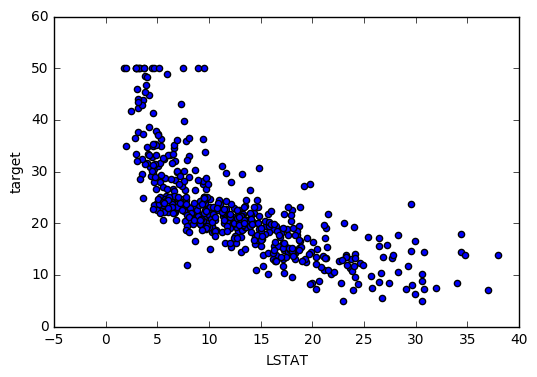

In [12]:
df_houses.plot(kind='scatter', x='LSTAT', y='target')

In [15]:
df_houses.corr(method='pearson').target

CRIM      -0.385832
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
target     1.000000
Name: target, dtype: float64

### Regresion Lineal (Scikit-learn)

In [14]:
# Una sola feature: nro-rooms(indice 5), %-poor (indice 12)
houses_X = houses.data[:, np.newaxis, 12]

# Separando los datos en datasets de entrenamiento y de test
houses_X_train = houses_X[:-20]
houses_X_test = houses_X[-20:]

# Separando la variable objetivo en conjunto de entrenamiento y de test
houses_y_train =  houses.target[:-20]
houses_y_test = houses.target[-20:]

('Coefficients: \n', array([-0.95692593]))
Mean squared error: 25.33
Variance score: -0.08


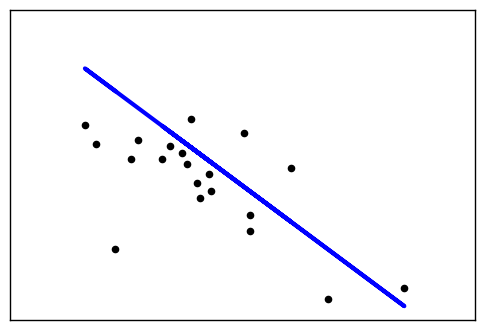

In [15]:
from sklearn import linear_model

# Creacion del modelo de regresion
regr = linear_model.LinearRegression()

# Entrenamiento del modelo
regr.fit(houses_X_train, houses_y_train)

# Coeficientes, Error Cuadrático Medio y Score Varianza Explicada (1 es predicción perfecta)
print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f" % np.mean((regr.predict(houses_X_test) - houses_y_test) ** 2))
print('Variance score: %.2f' % regr.score(houses_X_test, houses_y_test))

# Plot Resultados
plt.scatter(houses_X_test, houses_y_test,  color='black')
plt.plot(houses_X_test, regr.predict(houses_X_test), color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()